In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2023/train_data.csv
/kaggle/input/widsdatathon2023/test_data.csv
/kaggle/input/widsdatathon2023/sample_solution.csv


In [55]:
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

%matplotlib inline


In [56]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
##Loading train dataset

In [57]:
df = pd.read_csv('/kaggle/input/widsdatathon2023/train_data.csv')

In [58]:
df.head() 

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010

In [7]:
#remove index
#df=df.drop('index', axis='columns')

In [59]:
df.shape

(375734, 246)

In [60]:
df.dtypes

index                                         int64
lat                                         float64
lon                                         float64
startdate                                    object
contest-pevpr-sfc-gauss-14d__pevpr          float64
nmme0-tmp2m-34w__cancm30                    float64
nmme0-tmp2m-34w__cancm40                    float64
nmme0-tmp2m-34w__ccsm30                     float64
nmme0-tmp2m-34w__ccsm40                     float64
nmme0-tmp2m-34w__cfsv20                     float64
nmme0-tmp2m-34w__gfdlflora0                 float64
nmme0-tmp2m-34w__gfdlflorb0                 float64
nmme0-tmp2m-34w__gfdl0                      float64
nmme0-tmp2m-34w__nasa0                      float64
nmme0-tmp2m-34w__nmme0mean                  float64
contest-wind-h10-14d__wind-hgt-10           float64
nmme-tmp2m-56w__cancm3                      float64
nmme-tmp2m-56w__cancm4                      float64
nmme-tmp2m-56w__ccsm3                       float64
nmme-tmp2m-5

In [61]:
#checking categorical data climate by latitude
df_climate = df.groupby(['climateregions__climateregion'])['lat'].count()

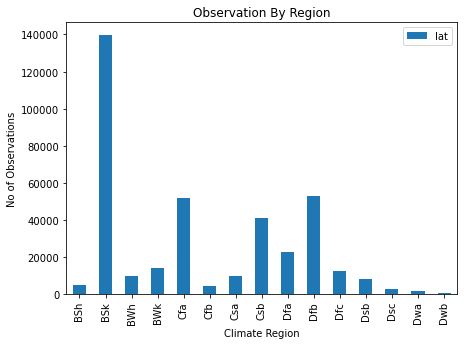

In [62]:
df_climate.plot(kind='bar', legend=True, title='Observation By Region',
                xlabel='Climate Region',
               ylabel='No of Observations', figsize=(7,5))
plt.show()

In [63]:
#startdate into datetime 

dates=pd.to_datetime(df['startdate'])




In [1]:
#splitting into separate columns for year, month and day - Feature Engineering
df['year'] = [d.year for d in dates]
df['month'] = [d.month for d in dates]
df['day'] =[d.day for d in dates]

NameError: name 'dates' is not defined

In [65]:
df.head(3)

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010

In [14]:
#dropping start date 
#df=df.drop(columns=['startdate'])

In [66]:
df.shape

(375734, 249)

In [86]:
df[df['year'] == 2014].count()

index                                       62708
lat                                         62708
lon                                         62708
startdate                                   62708
contest-pevpr-sfc-gauss-14d__pevpr          62708
nmme0-tmp2m-34w__cancm30                    62708
nmme0-tmp2m-34w__cancm40                    62708
nmme0-tmp2m-34w__ccsm30                     62708
nmme0-tmp2m-34w__ccsm40                     62708
nmme0-tmp2m-34w__cfsv20                     62708
nmme0-tmp2m-34w__gfdlflora0                 62708
nmme0-tmp2m-34w__gfdlflorb0                 62708
nmme0-tmp2m-34w__gfdl0                      62708
nmme0-tmp2m-34w__nasa0                      62708
nmme0-tmp2m-34w__nmme0mean                  62708
contest-wind-h10-14d__wind-hgt-10           62708
nmme-tmp2m-56w__cancm3                      62708
nmme-tmp2m-56w__cancm4                      62708
nmme-tmp2m-56w__ccsm3                       62708
nmme-tmp2m-56w__ccsm4                       62708


In [87]:
df.isna().sum()

index                                           0
lat                                             0
lon                                             0
startdate                                       0
contest-pevpr-sfc-gauss-14d__pevpr              0
nmme0-tmp2m-34w__cancm30                        0
nmme0-tmp2m-34w__cancm40                        0
nmme0-tmp2m-34w__ccsm30                     15934
nmme0-tmp2m-34w__ccsm40                         0
nmme0-tmp2m-34w__cfsv20                         0
nmme0-tmp2m-34w__gfdlflora0                     0
nmme0-tmp2m-34w__gfdlflorb0                     0
nmme0-tmp2m-34w__gfdl0                          0
nmme0-tmp2m-34w__nasa0                          0
nmme0-tmp2m-34w__nmme0mean                      0
contest-wind-h10-14d__wind-hgt-10               0
nmme-tmp2m-56w__cancm3                          0
nmme-tmp2m-56w__cancm4                          0
nmme-tmp2m-56w__ccsm3                       10280
nmme-tmp2m-56w__ccsm4                           0


In [88]:
#only nan variables
def na_cols(df):
    na_df = df.isna().sum() 
    if na_df[na_df > 0].tolist():
        return na_df[na_df > 0]
    else:
        return 'Clean dataset'

In [89]:
na_cols(df)

nmme0-tmp2m-34w__ccsm30    15934
nmme-tmp2m-56w__ccsm3      10280
nmme-prate-34w__ccsm3       8738
nmme0-prate-56w__ccsm30    15934
nmme0-prate-34w__ccsm30    15934
nmme-prate-56w__ccsm3      10280
nmme-tmp2m-34w__ccsm3       8738
ccsm30                     15934
dtype: int64

<AxesSubplot:>

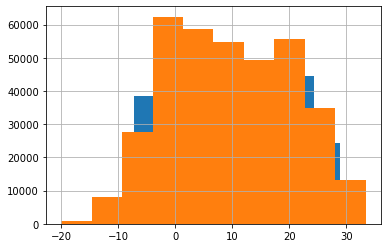

In [90]:
#lets see how the distribution is for these variables
df['nmme0-tmp2m-34w__ccsm30'].hist()
df['nmme-tmp2m-56w__ccsm3'].hist()



<AxesSubplot:>

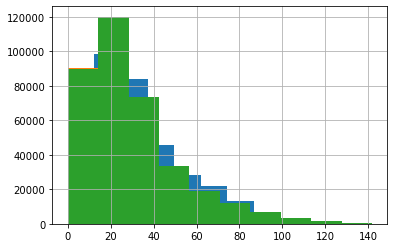

In [91]:
df['nmme-prate-34w__ccsm3'].hist()
df['nmme0-prate-56w__ccsm30'].hist()
df['nmme0-prate-34w__ccsm30'].hist()


<AxesSubplot:>

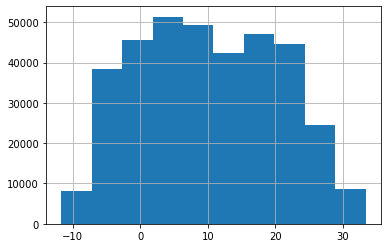

In [92]:
df['ccsm30'].hist()

<AxesSubplot:>

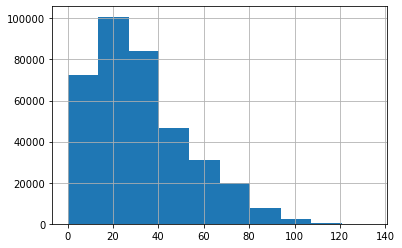

In [93]:
df['nmme-prate-56w__ccsm3'].hist()


<AxesSubplot:>

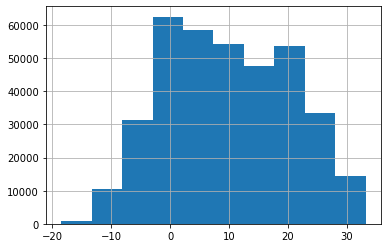

In [94]:
df['nmme-tmp2m-34w__ccsm3'].hist()

In [95]:
#lets check test set for any nan values
df_test = pd.read_csv('/kaggle/input/widsdatathon2023/test_data.csv')

In [96]:
df_test.shape

(31354, 245)

In [97]:
na_cols(df_test)
#test data looks clean without nan

'Clean dataset'

In [ ]:
#Since startdate is converted to 3 numeric columns, 
#the only other categorical variable is climate,convert climate columns 
#to numerics in train dataset
#pd.get_dummies(df, columns=['climateregions__climateregion'])

In [98]:
#lets take fill na with mean of the respective column for the whole train dataset
df=df.fillna(df.mean())


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [99]:
na_cols(df)

'Clean dataset'

#Now there are no null values

In [102]:
#lets encode climate regions
df = pd.get_dummies(df, columns=["climateregions__climateregion"], prefix="climate")

In [103]:
df.head(3)

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010-5,wind-uwnd-925-2010-6,wind-u

In [104]:
new_cols=['cfsv20', 'elevation__elevation', 'mjo1d__phase',
       'mjo1d__amplitude', 'mei__mei', 'mei__meirank', 'mei__nip', 'lat',
       'lon', 'year', 'month', 'day', 'climate_BSh', 'climate_BSk', 'climate_BWh', 'climate_BWk',
       'climate_Cfa', 'climate_Cfb', 'climate_Csa', 'climate_Csb',
       'climate_Dfa', 'climate_Dfb', 'climate_Dfc', 'climate_Dsb',
       'climate_Dsc', 'climate_Dwa', 'climate_Dwb', 
        'icec-2010-1', 'icec-2010-2', 'icec-2010-3', 'icec-2010-4',
       'icec-2010-5', 'icec-2010-6', 'icec-2010-7', 'icec-2010-8',
       'icec-2010-9', 'icec-2010-10','sst-2010-1', 'sst-2010-2',
        'sst-2010-3', 'sst-2010-4', 'sst-2010-5',
       'sst-2010-6', 'sst-2010-7', 'sst-2010-8', 'sst-2010-9', 'sst-2010-10',
        'contest-wind-h500-14d__wind-hgt-500', 'contest-slp-14d__slp',
          'nmme-tmp2m-34w__nmmemean']

In [105]:
#train data will have above column
df_train = df[new_cols]

In [110]:
df_train['target'] = df['contest-tmp2m-14d__tmp2m']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [112]:
df_train.shape

(375734, 51)

In [114]:
X=df_train.drop('target', axis=1)

In [115]:
X.shape

(375734, 50)

In [116]:
y=df_train.target

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#preprocessing
from sklearn.preprocessing import StandardScaler

In [118]:
ss=StandardScaler()
Xs=ss.fit_transform(X)

In [142]:
X_train, X_test,y_train, y_test = train_test_split(Xs,y ,
                                   random_state=108, 
                                   test_size=0.25)

In [137]:
ln=LinearRegression()

In [138]:
model1 = ln.fit(X_train,y_train)

In [139]:
y_predict_ln = model1.predict(X_test)

In [141]:
model1.score(X_test, y_test)

0.9693347623835036

In [143]:
from sklearn.ensemble import RandomForestRegressor

In [144]:
rf=RandomForestRegressor(n_estimators=100,max_features=20, )

In [145]:
model2=rf.fit(X_train,y_train)

In [146]:
y_predict_rf=model2.predict(X_test)

In [147]:
model2.score(X_test, y_test)

0.997861079805533

In [186]:
mse_rf = sklearn.metrics.mean_squared_error(y_test, y_predict_rf)
rmse_rf=math.sqrt(mse_rf)
rmse_rf

0.4560959089589327

In [150]:
X_test[0]

array([ 0.2739857 ,  1.22731543, -1.07799611,  1.0733013 ,  0.41337013,
        0.57181751,  0.53781188, -0.18793579, -0.18855142,  1.2115667 ,
       -0.15069667, -0.0839074 , -0.11750194,  1.30042281, -0.16108415,
       -0.19591794, -0.40033846, -0.10867853, -0.16108415, -0.34967234,
       -0.25334205, -0.40360368, -0.18494656, -0.14788099, -0.08856149,
       -0.0625    , -0.04415108, -0.69254127, -1.17386795, -1.13655011,
        1.41663727, -0.3581143 , -1.28359325, -1.89408383,  0.55148828,
        1.01698217,  0.88857226,  0.26715527, -1.0874771 ,  2.04342781,
       -0.53936132,  1.59419722,  0.71068912, -1.1783329 ,  0.78090657,
        0.58548735,  0.55623123,  1.56155638, -0.27277927,  1.035582  ])

In [151]:
model2.feature_importances_

array([4.91086217e-02, 1.08808470e-02, 3.49717515e-04, 9.32842531e-04,
       7.62848290e-04, 6.04192831e-04, 1.12256858e-04, 1.24445898e-02,
       7.29291224e-03, 1.63298239e-04, 7.04297064e-03, 8.12107083e-04,
       2.77023039e-05, 5.98060286e-04, 1.91236481e-03, 4.06818866e-04,
       9.68412686e-04, 8.73234459e-05, 2.87756205e-04, 3.63852586e-04,
       1.71484468e-04, 6.67594104e-04, 1.33362944e-03, 1.51335857e-04,
       8.03361622e-05, 1.80716459e-06, 1.85408536e-06, 3.40796265e-03,
       5.38594070e-03, 1.30554430e-03, 5.08005960e-03, 8.25763270e-03,
       6.34483759e-04, 2.78999288e-02, 3.76186120e-03, 8.42437632e-02,
       3.65130691e-03, 3.36745889e-03, 1.08861556e-02, 3.01959035e-03,
       2.45941995e-03, 1.27464101e-03, 1.81929842e-03, 2.30278370e-03,
       1.93172221e-03, 2.49824898e-03, 1.76505150e-03, 2.07735948e-01,
       5.25350618e-02, 4.67208599e-01])

In [ ]:
#picking 'nmme-tmp2m-34w__nmmemean'

In [ ]:
#lot of intercorrelation in the variables -picking 2 variables which are correlated with
#target and no intercollinearity
# 'contest-wind-h500-14d__wind-hgt-500' and 'contest-slp-14d__slp'

In [ ]:
#lets keep all sst

In [ ]:
#lets keep all of it for now

In [ ]:
##lets keep dfsv20and others but drop all can,cc,nasa and grd

In [ ]:
#lets keep all climates for now

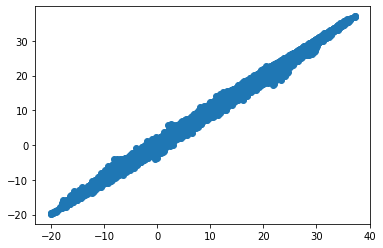

In [152]:
plt.scatter(y_test, y_predict_rf)

(5.453160472824407e-05,
 70.60273503084943,
 0.00011073948227618867,
 70.60279123872698)

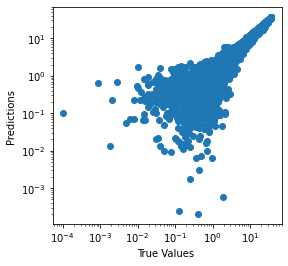

In [134]:
g=plt.scatter(y_test, y_predict_rf)
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

AttributeError: 'RandomForestRegressor' object has no attribute 'coef_'

In [179]:
X.columns

Index(['cfsv20', 'elevation__elevation', 'mjo1d__phase', 'mjo1d__amplitude',
       'mei__mei', 'mei__meirank', 'mei__nip', 'lat', 'lon', 'year', 'month',
       'day', 'climate_BSh', 'climate_BSk', 'climate_BWh', 'climate_BWk',
       'climate_Cfa', 'climate_Cfb', 'climate_Csa', 'climate_Csb',
       'climate_Dfa', 'climate_Dfb', 'climate_Dfc', 'climate_Dsb',
       'climate_Dsc', 'climate_Dwa', 'climate_Dwb', 'icec-2010-1',
       'icec-2010-2', 'icec-2010-3', 'icec-2010-4', 'icec-2010-5',
       'icec-2010-6', 'icec-2010-7', 'icec-2010-8', 'icec-2010-9',
       'icec-2010-10', 'sst-2010-1', 'sst-2010-2', 'sst-2010-3', 'sst-2010-4',
       'sst-2010-5', 'sst-2010-6', 'sst-2010-7', 'sst-2010-8', 'sst-2010-9',
       'sst-2010-10', 'contest-wind-h500-14d__wind-hgt-500',
       'contest-slp-14d__slp', 'nmme-tmp2m-34w__nmmemean'],
      dtype='object')

In [153]:
#lets do the same  with test data
df_test.shape

(31354, 245)

In [154]:
#startdate into datetime 

dates1=pd.to_datetime(df_test['startdate'])

In [155]:
#splitting into separate columns for year, month and day - Feature Engineering same as train data
df_test['year'] = [d.year for d in dates1]
df_test['month'] = [d.month for d in dates1]
df_test['day'] =[d.day for d in dates1]

In [156]:
df_test.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010-5,wind-uwnd-925-2010-6,w

In [128]:
df_test.columns

Index(['lat', 'lon', 'contest-pevpr-sfc-gauss-14d__pevpr',
       'nmme0-tmp2m-34w__cancm30', 'nmme0-tmp2m-34w__cancm40',
       'nmme0-tmp2m-34w__ccsm30', 'nmme0-tmp2m-34w__ccsm40',
       'nmme0-tmp2m-34w__cfsv20', 'nmme0-tmp2m-34w__gfdlflora0',
       'nmme0-tmp2m-34w__gfdlflorb0',
       ...
       'wind-vwnd-925-2010-14', 'wind-vwnd-925-2010-15',
       'wind-vwnd-925-2010-16', 'wind-vwnd-925-2010-17',
       'wind-vwnd-925-2010-18', 'wind-vwnd-925-2010-19',
       'wind-vwnd-925-2010-20', 'year', 'month', 'day'],
      dtype='object', length=246)

In [157]:
#encoding climate regions
df_test = pd.get_dummies(df_test, columns=["climateregions__climateregion"], prefix="climate")

In [158]:
df_test.head(3)

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010-5,wind-uwnd-925-2010-6,wind-uwnd-925-2010-7,wind-uwnd-

In [159]:
#now pick only the variables we used for train data
test = df_test[new_cols]

In [160]:
test.shape

(31354, 50)

In [161]:
test.columns

Index(['cfsv20', 'elevation__elevation', 'mjo1d__phase', 'mjo1d__amplitude',
       'mei__mei', 'mei__meirank', 'mei__nip', 'lat', 'lon', 'year', 'month',
       'day', 'climate_BSh', 'climate_BSk', 'climate_BWh', 'climate_BWk',
       'climate_Cfa', 'climate_Cfb', 'climate_Csa', 'climate_Csb',
       'climate_Dfa', 'climate_Dfb', 'climate_Dfc', 'climate_Dsb',
       'climate_Dsc', 'climate_Dwa', 'climate_Dwb', 'icec-2010-1',
       'icec-2010-2', 'icec-2010-3', 'icec-2010-4', 'icec-2010-5',
       'icec-2010-6', 'icec-2010-7', 'icec-2010-8', 'icec-2010-9',
       'icec-2010-10', 'sst-2010-1', 'sst-2010-2', 'sst-2010-3', 'sst-2010-4',
       'sst-2010-5', 'sst-2010-6', 'sst-2010-7', 'sst-2010-8', 'sst-2010-9',
       'sst-2010-10', 'contest-wind-h500-14d__wind-hgt-500',
       'contest-slp-14d__slp', 'nmme-tmp2m-34w__nmmemean'],
      dtype='object')

In [162]:
#normalise
test_std = ss.fit_transform(test)

In [164]:
#let's predict for random forest
test_predict = model2.predict(test_std)

In [165]:
sample_sol = pd.read_csv('/kaggle/input/widsdatathon2023/sample_solution.csv')

In [166]:
sample_sol.shape

(31354, 2)

In [167]:
sample_sol.head(10)

,contest-tmp2m-14d__tmp2m,index
0,27.073876,375734
1,25.109308,375735
2,22.557390,375736
3,25.572875,375737
4,20.781073,375738
5,29.639184,375739
6,27.696501,375740
7,28.002456,375741
8,29.416101,375742
9,23.187186,375743


In [168]:
df_test['contest-tmp2m-14d__tmp2m']=test_predict

In [169]:
df_sub = df_test[['contest-tmp2m-14d__tmp2m', 'index']]

In [170]:
df_sub.columns

Index(['contest-tmp2m-14d__tmp2m', 'index'], dtype='object')

In [171]:
df_sub.head(10)

,contest-tmp2m-14d__tmp2m,index
0,30.210060,375734
1,30.256468,375735
2,30.223603,375736
3,30.232858,375737
4,30.261138,375738
5,30.270229,375739
6,30.271719,375740
7,30.283573,375741
8,30.245242,375742
9,30.226890,375743


In [172]:
df_sub.tail()

,contest-tmp2m-14d__tmp2m,index
31349,-1.587942,407083
31350,-1.956044,407084
31351,-2.771349,407085
31352,-2.461580,407086
31353,-3.124355,407087


In [173]:
#second_submission
df_sub.to_csv('submission2_rf.csv',index=False)

In [176]:
#lets try the same with xgboostregressor
import xgboost as xgb
xg=xgb.XGBRegressor(seed=1)

In [177]:
model3_xg=xg.fit(X_train, y_train)

In [178]:
y_predict_xg=model3_xg.predict(X_test)

In [185]:
model3_xg.score(X_test, y_test)

0.9932202122149815

In [180]:
import math  
import sklearn.metrics  

In [181]:
mse = sklearn.metrics.mean_squared_error(y_test, y_predict_xg)  

In [183]:
rmse=math.sqrt(mse)
rmse

0.8120203934152147

In [188]:
from sklearn.ensemble import ExtraTreesRegressor

In [189]:
et=ExtraTreesRegressor()

In [190]:
model_et=et.fit(X_train,y_train)

In [191]:
y_predict_et=model_et.predict(X_test)

In [192]:
mse_et = sklearn.metrics.mean_squared_error(y_test, y_predict_et)
rmse_et = math.sqrt(mse_et)
rmse_et

0.3490280215113343

In [193]:
model_et.score(X_test, y_test)

0.9987474276569591

In [194]:
#predicting for test set et model
test_predict_et = model_et.predict(test_std)

In [195]:
df_test_new=df_test.drop('contest-tmp2m-14d__tmp2m', axis=1)

In [197]:
df_test_new.shape

(31354, 262)

In [198]:
df_test_new['contest-tmp2m-14d__tmp2m'] = test_predict_et

In [199]:
test_sub_et=df_test_new[['contest-tmp2m-14d__tmp2m', 'index']]

In [201]:
test_sub_et.head()

,contest-tmp2m-14d__tmp2m,index
0,31.380386,375734
1,31.452427,375735
2,31.518945,375736
3,31.517302,375737
4,31.546569,375738


In [202]:
test_sub_et.tail()

,contest-tmp2m-14d__tmp2m,index
31349,-3.534620,407083
31350,-3.844635,407084
31351,-4.180754,407085
31352,-3.879761,407086
31353,-4.141585,407087


In [203]:
#third_submission
df_sub.to_csv('submission3_et.csv',index=False)

In [204]:
#now lets check wind variables
df_wind=df.loc[:, df.columns.str.startswith('wind')]

In [205]:
df_wind.head()

,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010-5,wind-uwnd-925-2010-6,wind-uwnd-925-2010-7,wind-uwnd-925-2010-8,wind-uwnd-925-2010-9,wind-uwnd-925-2010-10,wind-uwnd-925-2010-11,wind-uwnd-925-2010-12,wind-uwnd-925-2010-13,wind-uwnd-925-2010-14,wind-uwnd-925-2010-15,wind-uwnd-925-2010-16,wind-uwnd-925-2010-17,wind-uwnd-925-2010-18,wind-uwnd-925-2010-19,wind-uwnd-925-2010-20,wind-hgt-10-2010-1,wind-hgt-10-2010-2,wind-hgt-10-2010-3,wind-hgt-10-2010-4,wind-hgt-10-2010-5,wind-hgt-10-2010-6,wind-hgt-10-2010-7,wind-hgt-10-2010-8,wind-hgt-10-2010-9,wind-hgt-10-2010-10,wind-hgt-100-2010-1,wind-hgt-100-2010-2,wind-hgt-100-2010-3,wind-hgt-100-2010-4,wind-hgt-100-2010-5,wind-hgt-100-2010-6,wind-hgt-100-2010-7,wind-hgt-100-2010-8,wind-hgt-100-2010-9,wind-hgt-100-2010-10,wind-vwnd-925-2010-1,wind-vwnd-925-2010-2,wind-vwnd-925-2010-3,wind-vwnd-925-2010-4,wind-vwnd-925-2010-5,wind-vwnd-925-2010-6,wind-vwnd-925-2010-7,wind-vwnd-925-2010-8,wind-vwnd-925-2010-9,wind-vwnd-925-2010-10,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,-111.29,33.66,-129.06,20.57,-123.14,-158.00,-125.92,104.95,15.14,-99.89,7.88,5.91,-208.23,18.67,21.00,134.88,43.65,-44.70,-3.70,-65.02,628.66,130.79,163.84,80.55,-86.61,83.69,-79.66,99.19,-11.93,21.48,62.06,285.66,-114.96,-28.03,-109.81,125.75,-71.99,35.85,-17.34,19.48,-2277.72,410.10,-2321.02,-1423.47,1064.98,-816.00,77.17,90.35,-160.02,413.91,-7267.97,1100.68,-3189.61,993.02,1410.84,-1868.95,-1254.45,714.05,1549.20,-602.97,143.64,-13.59,-64.22,-0.32,124.30,-1.43,-81.98,61.40,89.64,17.96,-9.56,66.65,3.00,-69.20,-69.16,27.55,-18.55,-54.43,-12.14,39.02,-72427.68,-16054.10,10487.61,-4560.34,7128.13,-2281.45,-6076.15,-2209.63,3864.18,-3051.21,-25749.70,-5160.59,-1507.91,3391.32,-288.52,-1585.41,1544.02,944.73,-1267.75,-2402.46,-107.46,42.55,29.16,-63.35,23.47,45.56,-33.43,-3.89,4.18,69.09,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,-99.47,53.80,-117.91,56.54,-123.66,-150.93,-109.57,117.10,-2.39,-113.06,1.33,17.87,-206.98,23.89,5.08,139.95,45.29,-37.26,3.63,-50.56,615.58,135.48,166.71,69.06,-89.23,85.25,-68.43,109.73,6.93,11.32,72.99,269.52,-130.30,-21.22,-93.94,148.57,-62.79,28.76,-7.75,25.38,-2287.34,354.17,-2270.79,-1419.57,977.45,-670.75,77.48,-48.07,-71.80,507.96,-7189.77,970.54,-3095.67,891.34,1382.87,-1740.29,-953.14,769.46,1667.04,-849.11,143.41,-13.11,-61.28,-2.19,119.37,-9.00,-95.96,64.90,92.06,29.89,-5.77,61.97,1.23,-71.98,-63.53,38.16,-16.09,-50.22,-8.39,36.31,-70659.22,-16485.03,12437.04,-5318.37,8109.37,-1957.36,-6672.23,-3786.

In [206]:
df_wind.shape

(375734, 120)

In [209]:
df_wind['target']=df['contest-tmp2m-14d__tmp2m']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [210]:
df_wind.shape

(375734, 121)

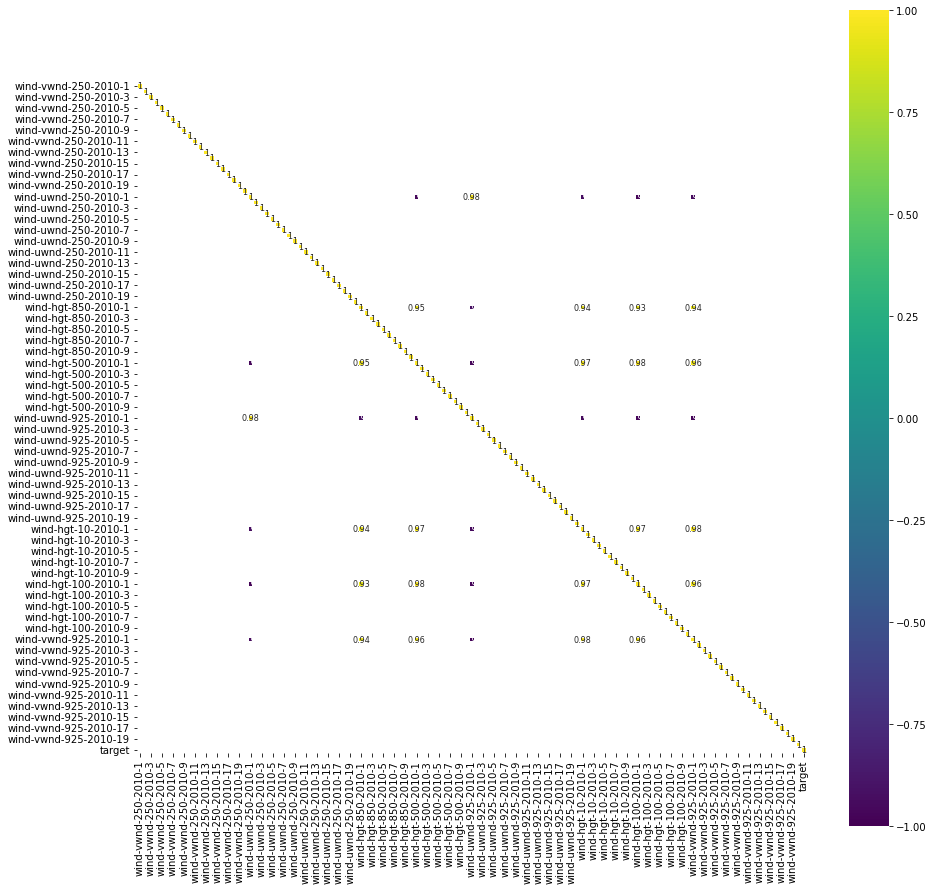

In [211]:
corr = df_wind.corr() 
plt.figure(figsize=(15, 15))

sns.heatmap(corr[(corr >= 0.9) | (corr <= -0.9)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [212]:
# Using Pearson Correlation
corr_matrix = df_wind.corr().abs()

# Select upper triangle of correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [213]:
# Find features with correlation greater than 0.95
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= 0.95)]
print(to_drop)

['wind-hgt-500-2010-1', 'wind-uwnd-925-2010-1', 'wind-hgt-10-2010-1', 'wind-hgt-100-2010-1', 'wind-vwnd-925-2010-1']


In [214]:
# Dropped highly correlated features from the dataset
df_wind = df_wind.drop(to_drop, axis=1)
df_wind.head()

,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010-5,wind-uwnd-925-2010-6,wind-uwnd-925-2010-7,wind-uwnd-925-2010-8,wind-uwnd-925-2010-9,wind-uwnd-925-2010-10,wind-uwnd-925-2010-11,wind-uwnd-925-2010-12,wind-uwnd-925-2010-13,wind-uwnd-925-2010-14,wind-uwnd-925-2010-15,wind-uwnd-925-2010-16,wind-uwnd-925-2010-17,wind-uwnd-925-2010-18,wind-uwnd-925-2010-19,wind-uwnd-925-2010-20,wind-hgt-10-2010-2,wind-hgt-10-2010-3,wind-hgt-10-2010-4,wind-hgt-10-2010-5,wind-hgt-10-2010-6,wind-hgt-10-2010-7,wind-hgt-10-2010-8,wind-hgt-10-2010-9,wind-hgt-10-2010-10,wind-hgt-100-2010-2,wind-hgt-100-2010-3,wind-hgt-100-2010-4,wind-hgt-100-2010-5,wind-hgt-100-2010-6,wind-hgt-100-2010-7,wind-hgt-100-2010-8,wind-hgt-100-2010-9,wind-hgt-100-2010-10,wind-vwnd-925-2010-2,wind-vwnd-925-2010-3,wind-vwnd-925-2010-4,wind-vwnd-925-2010-5,wind-vwnd-925-2010-6,wind-vwnd-925-2010-7,wind-vwnd-925-2010-8,wind-vwnd-925-2010-9,wind-vwnd-925-2010-10,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20,target
0,-111.29,33.66,-129.06,20.57,-123.14,-158.00,-125.92,104.95,15.14,-99.89,7.88,5.91,-208.23,18.67,21.00,134.88,43.65,-44.70,-3.70,-65.02,628.66,130.79,163.84,80.55,-86.61,83.69,-79.66,99.19,-11.93,21.48,62.06,285.66,-114.96,-28.03,-109.81,125.75,-71.99,35.85,-17.34,19.48,-2277.72,410.10,-2321.02,-1423.47,1064.98,-816.00,77.17,90.35,-160.02,413.91,1100.68,-3189.61,993.02,1410.84,-1868.95,-1254.45,714.05,1549.20,-602.97,-13.59,-64.22,-0.32,124.30,-1.43,-81.98,61.40,89.64,17.96,-9.56,66.65,3.00,-69.20,-69.16,27.55,-18.55,-54.43,-12.14,39.02,-16054.10,10487.61,-4560.34,7128.13,-2281.45,-6076.15,-2209.63,3864.18,-3051.21,-5160.59,-1507.91,3391.32,-288.52,-1585.41,1544.02,944.73,-1267.75,-2402.46,42.55,29.16,-63.35,23.47,45.56,-33.43,-3.89,4.18,69.09,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58,28.744480
1,-99.47,53.80,-117.91,56.54,-123.66,-150.93,-109.57,117.10,-2.39,-113.06,1.33,17.87,-206.98,23.89,5.08,139.95,45.29,-37.26,3.63,-50.56,615.58,135.48,166.71,69.06,-89.23,85.25,-68.43,109.73,6.93,11.32,72.99,269.52,-130.30,-21.22,-93.94,148.57,-62.79,28.76,-7.75,25.38,-2287.34,354.17,-2270.79,-1419.57,977.45,-670.75,77.48,-48.07,-71.80,507.96,970.54,-3095.67,891.34,1382.87,-1740.29,-953.14,769.46,1667.04,-849.11,-13.11,-61.28,-2.19,119.37,-9.00,-95.96,64.90,92.06,29.89,-5.77,61.97,1.23,-71.98,-63.53,38.16,-16.09,-50.22,-8.39,36.31,-16485.03,12437.04,-5318.37,8109.37,-1957.36,-6672.23,-3786.46,2626.55,-3623.29,-5356.70,-1367.76,3188.99,-221.06,-1193.63,1256.48,2018.62,-1110.56,-2413.81,45.91,34.83,-56.93,36.28,41.43,-38.06,-1.65,10.08,71.93,-

In [215]:
df_wind.shape

(375734, 116)

In [216]:
x1=df_wind.drop('target', axis=1)

In [217]:
x1.shape

(375734, 115)

In [218]:
y1=df['contest-tmp2m-14d__tmp2m']

In [219]:
y.shape

(375734,)

In [221]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.3, normalize=True)


In [224]:
model_lasso=lassoReg.fit(X_train,y_train)
y_predict_lasso = model_lasso.predict(X_test)
# calculating mse
mse_ln = sklearn.metrics.mean_squared_error(y_test, y_predict_lasso)
rmse_lasso =math.sqrt(mse_ln)
rmse_lasso

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


9.861935096516454

In [ ]:
mse
1346205.82
lassoReg.score(x_cv,y_cv)
0.5720